# `intpp` practice

`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`pip install git+https://github.com/jbusecke/cmip6_preprocessing.git`

`mv *.png ../figures`

In [1]:
import xarray as xr
import xesmf as xe
from cmip6_preprocessing.preprocessing import combined_preprocessing
# import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from dask.diagnostics import ProgressBar
from xgcm import Grid
from xhistogram.xarray import histogram
import pandas as pd
import scipy

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

# CESM2-FV2
>`CMIP6.CMIP.NCAR.CESM2-FV2.historical.r1i1p1f1.Omon.vo.gn.v20191120`

> `CMIP6.CMIP.NCAR.CESM2-FV2.historical.r1i1p1f1.SImon.siconc.gn.v20191120`

> `CMIP6.CMIP.NCAR.CESM2-FV2.historical.r1i1p1f1.Omon.intpp.gn.v20191120`

## CESM2-FV2 has `intpp`, `hfds`, and `vo` as `gn`.
## CESM2-FV2 has `intpp` and `hfds` as `gr`.
## CESM2-FV2 does NOT have `siconc`.

In [3]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r1i1p1f1'],
             grid_label=['gr'],
              source_id=['CESM2-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CESM2FV2 = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_CESM2FV2 = merge_variables(dd_CESM2FV2)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_CESM2FV2 = combine_datasets(
    dd_CESM2FV2,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_CESM2FV2.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('CESM2-FV2.gr.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 180, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    * time           (time) object 1850-01-15 13:00:00 ... 2014-12-15 12:00:00
      lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
      lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
      lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
      lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
      lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=

# CESM2
> `CMIP6.CMIP.NCAR.CESM2.historical.r1i1p1f1.Omon.vo.gn.v20190308`

>`CMIP6.CMIP.NCAR.CESM2.historical.r1i1p1f1.SImon.siconc.gn.v20190308`

>`CMIP6.CMIP.NCAR.CESM2.historical.r11i1p1f1.Omon.intpp.gn.v20190514`

In [4]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r1i1p1f1'],
             grid_label=['gr'],
              source_id=['CESM2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CESM2 = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_CESM2 = merge_variables(dd_CESM2)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_CESM2 = combine_datasets(
    dd_CESM2,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_CESM2.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('CESM2.gr.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 180, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    * time           (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12...
      lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
      lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
      lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
      lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
      lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=

# CESM2-WACCM
> `CMIP6.CMIP.NCAR.CESM2-WACCM.historical.r3i1p1f1.Omon.vo.gn.v20190917`

> `CMIP6.CMIP.NCAR.CESM2-WACCM.historical.r3i1p1f1.SImon.siconc.gn`

> `CMIP6.CMIP.NCAR.CESM2-WACCM.historical.r3i1p1f1.Omon.intpp.gn.v20190808`

In [5]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r3i1p1f1'],
             grid_label=['gr'],
              source_id=['CESM2-WACCM']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CESM2WACCM = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_CESM2WACCM = merge_variables(dd_CESM2WACCM)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_CESM2WACCM = combine_datasets(
    dd_CESM2WACCM,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_CESM2WACCM.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('CESM2-WACCM.gr.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 180, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    * time           (time) object 1850-01-15 13:00:00 ... 2014-12-15 12:00:00
      lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
      lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
      lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
      lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
      lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), met

# CESM2-WACCM-FV2
> `CMIP6.CMIP.NCAR.CESM2-WACCM-FV2.historical.r1i1p1f1.Omon.intpp.gr.v20191120`

> `CMIP6.CMIP.NCAR.CESM2-WACCM-FV2.historical.r1i1p1f1.SImon.siconc.gn.v20191120`

> `CMIP6.CMIP.NCAR.CESM2-WACCM-FV2.historical.r1i1p1f1.Omon.vo.gn.v20191120`

In [6]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r1i1p1f1'],
             grid_label=['gr'],
              source_id=['CESM2-WACCM-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CESM2WACCMFV2 = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_CESM2WACCMFV2 = merge_variables(dd_CESM2WACCMFV2)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_CESM2WACCMFV2 = combine_datasets(
    dd_CESM2WACCMFV2,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_CESM2WACCMFV2.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('CESM2-WACCM-FV2.gr.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 180, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    * time           (time) object 1850-01-15 13:00:00 ... 2014-12-15 12:00:00
      lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
      lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
      lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
      lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
      lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180),

# UKESM1-0-LL
> `CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r9i1p1f2.Omon.vo.gn.v20190603`

> `CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r9i1p1f2.SImon.siconc.gn.v20200310` 

> `CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r9i1p1f2.Omon.intpp.gn.v20191015`

In [7]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r9i1p1f2'],
             # grid_label=['gn'],
              source_id=['UKESM1-0-LL']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_UKESM1 = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_UKESM1 = merge_variables(dd_UKESM1)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_UKESM1 = combine_datasets(
    dd_UKESM1,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_UKESM1.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('UKESM1-0-LL.gn.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 330, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * x              (x) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    * y              (y) int32 0 1 2 3 4 5 6 7 ... 322 323 324 325 326 327 328 329
    * time           (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
      lat            (y, x) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
      lon            (y, x) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lat_verticies  (y, x, vertex) float32 dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
      lon_verticies  (y, x, vertex) float32 dask.array<chunksize=(330, 360, 4), meta=np.ndarray>
      lon_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 330, 360), meta=np.ndarray>
      lat_bounds     (bnds, y, x) float32 dask.array<chunksize=(

# CanESM5-CanOE
> `CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r3i1p2f1.Omon.vo.gn.v20190429`

> `CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r3i1p2f1.SImon.siconc.gn.v20190429`

> `CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r3i1p2f1.Omon.intpp.gn.v20190429` 

In [8]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r3i1p2f1'],
             # grid_label=['gn'],
              source_id=['CanESM5-CanOE']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CanOE = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_CanOE = merge_variables(dd_CanOE)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_CanOE = combine_datasets(
    dd_CanOE,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_CanOE.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('CanESM5-CanOE.gn.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 291, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * x              (x) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    * y              (y) int32 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
    * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
      lat            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
      lon            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
      lon_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
      lon_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 291, 360), meta=np.ndarray>
      lat_bounds     (bnds, y, x) float64 dask.array<chunksize

# MRI-ESM2-0
> `CMIP6.CMIP.MRI.MRI-ESM2-0.historical.r1i2p1f1.Omon.intpp.gn.v20210311`

> `CMIP6.CMIP.MRI.MRI-ESM2-0.historical.r1i2p1f1.SImon.siconc.gn.v20210311`

> `CMIP6.CMIP.MRI.MRI-ESM2-0.historical.r1i2p1f1.Omon.vo.gn.v20210311` 

In [9]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r1i2p1f1'],
             grid_label=['gr'],
              source_id=['MRI-ESM2-0']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_MRI = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_MRI = merge_variables(dd_MRI)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_MRI = combine_datasets(
    dd_MRI,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_MRI.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('MRI-ESM2-0.gr.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 180, x: 360, bnds: 2, vertex: 4)
  Coordinates:
    * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
      lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
      lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
      lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
      lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
      lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
      lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta

# IPSL-CM6A-LR
> `CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.vo.gn.v20180803`

> `CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.SImon.siconc.gn.v20180803`

> `CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.intpp.gn.v20180803`

In [10]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r1i1p1f1'],
             # grid_label=['gn'],
              source_id=['IPSL-CM6A-LR']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_IPSL = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_IPSL = merge_variables(dd_IPSL)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_IPSL = combine_datasets(
    dd_IPSL,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_IPSL.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('IPSL-CM6A-LR.gn.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (y: 332, x: 362, time: 1980, vertex: 4, bnds: 2)
  Coordinates:
      lat_verticies  (y, x, vertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
      lon_verticies  (y, x, vertex) float32 dask.array<chunksize=(332, 362, 4), meta=np.ndarray>
    * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
      lat            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
      lon            (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    * y              (y) int64 0 1 2 3 4 5 6 7 ... 324 325 326 327 328 329 330 331
    * x              (x) int64 0 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360 361
      lon_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 332, 362), meta=np.ndarray>
      lat_bounds     (bnds, y, x) float32 dask.array<chunksize=

# CNRM-ESM2-1
> `CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r6i1p1f2.Omon.intpp.gn.v20200117`

> `CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r4i1p1f2.SImon.siconc.gn.v20190125`

> `CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r6i1p1f2.Omon.vo.gn.v20200117`

In [11]:
variables = ['intpp']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             member_id = ['r6i1p1f2'],
             # grid_label=['gn'],
              source_id=['CNRM-ESM2-1']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_CNRM = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_CNRM = merge_variables(dd_CNRM)
# list(dd_new.keys())

# temp={}
# for name,item in dd_gn.items():
#     #print(name)
#     #print(item.data_vars)
#     present = item.data_vars
#     if all(i in present for i in variables):
#         #print(name)
#         temp[name]=item
# dd_gn = temp


dd_CNRM = combine_datasets(
    dd_CNRM,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)

list(dd_CNRM.items())
# dd_new_new_gn


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


[('CNRM-ESM2-1.gn.historical.Omon',
  <xarray.Dataset>
  Dimensions:        (time: 1980, y: 294, x: 362, vertex: 4, bnds: 2)
  Coordinates:
      lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
      lon_verticies  (y, x, vertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
      lat            (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
      lon            (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
      time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    * y              (y) int64 0 1 2 3 4 5 6 7 ... 286 287 288 289 290 291 292 293
    * x              (x) int64 0 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360 361
      lon_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 294, 362), meta=np.ndarray>
      lat_bounds     (bnds, y, x) float64 dask.array<chunksize=(

In [12]:
dd = {**dd_CESM2FV2, **dd_CESM2, **dd_CESM2WACCM, **dd_CESM2WACCMFV2, **dd_UKESM1, **dd_CanOE, **dd_MRI, **dd_IPSL, **dd_CNRM}

In [13]:
list(dd.keys())

['CESM2-FV2.gr.historical.Omon',
 'CESM2.gr.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'CESM2-WACCM-FV2.gr.historical.Omon',
 'UKESM1-0-LL.gn.historical.Omon',
 'CanESM5-CanOE.gn.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon',
 'IPSL-CM6A-LR.gn.historical.Omon',
 'CNRM-ESM2-1.gn.historical.Omon']

# Regrid

In [14]:
# Regrid
targetgrid_ds = xe.util.grid_global(1.0, 1.0)
targetgrid_ds['lon'] = targetgrid_ds['lon']+180
targetgrid_ds['lon_b'] = targetgrid_ds['lon_b']+180
newcoords = {'x':targetgrid_ds['lon'][0,:],'y':targetgrid_ds['lat'][:,0]}

dd_regrid={}
for name,item in dd.items():
    regridder = xe.Regridder(item, targetgrid_ds, 'bilinear', 
                         periodic=True, ignore_degenerate=True)
    ds_regridded = regridder(item['intpp']).assign_coords(**newcoords).chunk({'time':120})
    dd_regrid[name]=ds_regridded
list(dd_regrid.keys())

['CESM2-FV2.gr.historical.Omon',
 'CESM2.gr.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'CESM2-WACCM-FV2.gr.historical.Omon',
 'UKESM1-0-LL.gn.historical.Omon',
 'CanESM5-CanOE.gn.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon',
 'IPSL-CM6A-LR.gn.historical.Omon',
 'CNRM-ESM2-1.gn.historical.Omon']

In [15]:
for name,item in dd_regrid.items():
    dd_regrid[name] = item.isel(time = slice(0,239)).mean('time', keep_attrs = True)
list(dd_regrid.keys())

['CESM2-FV2.gr.historical.Omon',
 'CESM2.gr.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'CESM2-WACCM-FV2.gr.historical.Omon',
 'UKESM1-0-LL.gn.historical.Omon',
 'CanESM5-CanOE.gn.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon',
 'IPSL-CM6A-LR.gn.historical.Omon',
 'CNRM-ESM2-1.gn.historical.Omon']

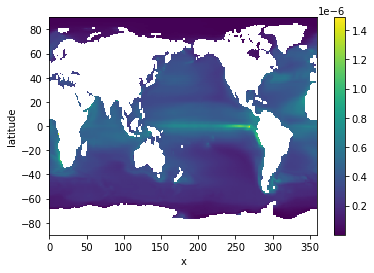

In [21]:
dd_regrid['CESM2-FV2.gr.historical.Omon'].plot()

In [16]:
dd = {}
dd['UKESM1-0-LL.gn.historical.Omon'] = xr.open_mfdataset('UKESM1_*_20yr.nc').sel(y = slice(-80,-30))
dd['CanESM5-CanOE.gn.historical.Omon']= xr.open_mfdataset('CanESM5CanOE*_20yr.nc').sel(y = slice(-80,-30))
dd['CNRM-ESM2-1.gn.historical.Omon']= xr.open_mfdataset('CNRM*_20yr.nc').sel(y = slice(-80,-30))
# dd['CanESM5.gn.historical.Omon']= xr.open_mfdataset('CanESM5_*_20yr.nc').sel(lev = slice(0, 500), y = slice(-80,-30))
dd['IPSL-CM6A-LR.gn.historical.Omon']= xr.open_mfdataset('IPSL*_20yr.nc').sel(y = slice(-80,-30))
dd['CESM2-WACCM.gr.historical.Omon']= xr.open_mfdataset('CESM2-WACCM_*_20yr.nc').sel(y = slice(-80,-30))
dd['CESM2.gr.historical.Omon']= xr.open_mfdataset('CESM2_*_20yr.nc').sel(y = slice(-80,-30))
dd['CESM2-WACCM-FV2.gr.historical.Omon']= xr.open_mfdataset('CESM2-WACCM-FV2_*_20yr.nc').sel(y = slice(-80,-30))
# dd['GFDL-ESM4.gr.historical.Omon']= xr.open_mfdataset('GFDL-ESM4_*_20yr.nc').sel(lev = slice(0, 500), y = slice(-80,-30))
dd['CESM2-FV2.gr.historical.Omon']= xr.open_mfdataset('CESM2-FV2_*_20yr.nc').sel(y = slice(-80,-30))
# dd['GFDL-CM4.gr.historical.Omon']= xr.open_mfdataset('GFDL-CM4_*_20yr.nc').sel(lev = slice(0, 500), y = slice(-80,-30))
dd['MRI-ESM2-0.gr.historical.Omon']= xr.open_mfdataset('MRI-ESM2-0_*_20yr.nc').sel(y = slice(-80,-30))
# A = xr.open_mfdataset('AREA.nc')

In [17]:
for name, ds in dd.items():
    ds['intpp'] = dd_regrid[name]
ds

<xarray.Dataset>
Dimensions:  (y: 50, lev: 61, x: 360)
Coordinates:
  * y        (y) float64 -79.5 -78.5 -77.5 -76.5 ... -33.5 -32.5 -31.5 -30.5
  * lev      (lev) float64 1.0 3.5 6.5 10.0 ... 5.5e+03 6.15e+03 6.525e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lon      (x, y) float64 dask.array<chunksize=(360, 50), meta=np.ndarray>
    lat      (x, y) float64 dask.array<chunksize=(360, 50), meta=np.ndarray>
Data variables:
    dissic   (lev, y, x) float32 dask.array<chunksize=(61, 50, 360), meta=np.ndarray>
    fgco2    (y, x) float32 dask.array<chunksize=(50, 360), meta=np.ndarray>
    so       (lev, y, x) float32 dask.array<chunksize=(61, 50, 360), meta=np.ndarray>
    talk     (lev, y, x) float32 dask.array<chunksize=(61, 50, 360), meta=np.ndarray>
    thetao   (lev, y, x) float32 dask.array<chunksize=(61, 50, 360), meta=np.ndarray>
    intpp    (y, x) float32 dask.array<chunksize=(50, 360), meta=np.ndarray>

# I def need to multiply `intpp` by `area` but for now I will not since this is just practice

In [21]:
model_kwargs = {}
model_kwargs['UKESM1-0-LL.gn.historical.Omon'] = {'color': '#8f5904'}
model_kwargs['CanESM5-CanOE.gn.historical.Omon'] = {'color': '#a1a1a1'}
model_kwargs['CNRM-ESM2-1.gn.historical.Omon'] = {'color': '#cc0000'}
model_kwargs['CanESM5.gn.historical.Omon'] = {'color': '#ff8200'}
model_kwargs['IPSL-CM6A-LR.gn.historical.Omon'] = {'color': '#f1c232'}
model_kwargs['CESM2-WACCM.gr.historical.Omon'] = {'color': '#8fce00'}
model_kwargs['CESM2.gr.historical.Omon'] = {'color': '#20b2aa'}
model_kwargs['CESM2-WACCM-FV2.gr.historical.Omon'] = {'color': '#66ccff'}
model_kwargs['GFDL-ESM4.gr.historical.Omon'] = {'color': '#674ea7'}
model_kwargs['GFDL-CM4.gr.historical.Omon'] = {'color': '#800080'}
model_kwargs['MRI-ESM2-0.gr.historical.Omon'] = {'color': '#ff80ed'}
model_kwargs['CESM2-FV2.gr.historical.Omon'] = {'color': '#024c8f'}

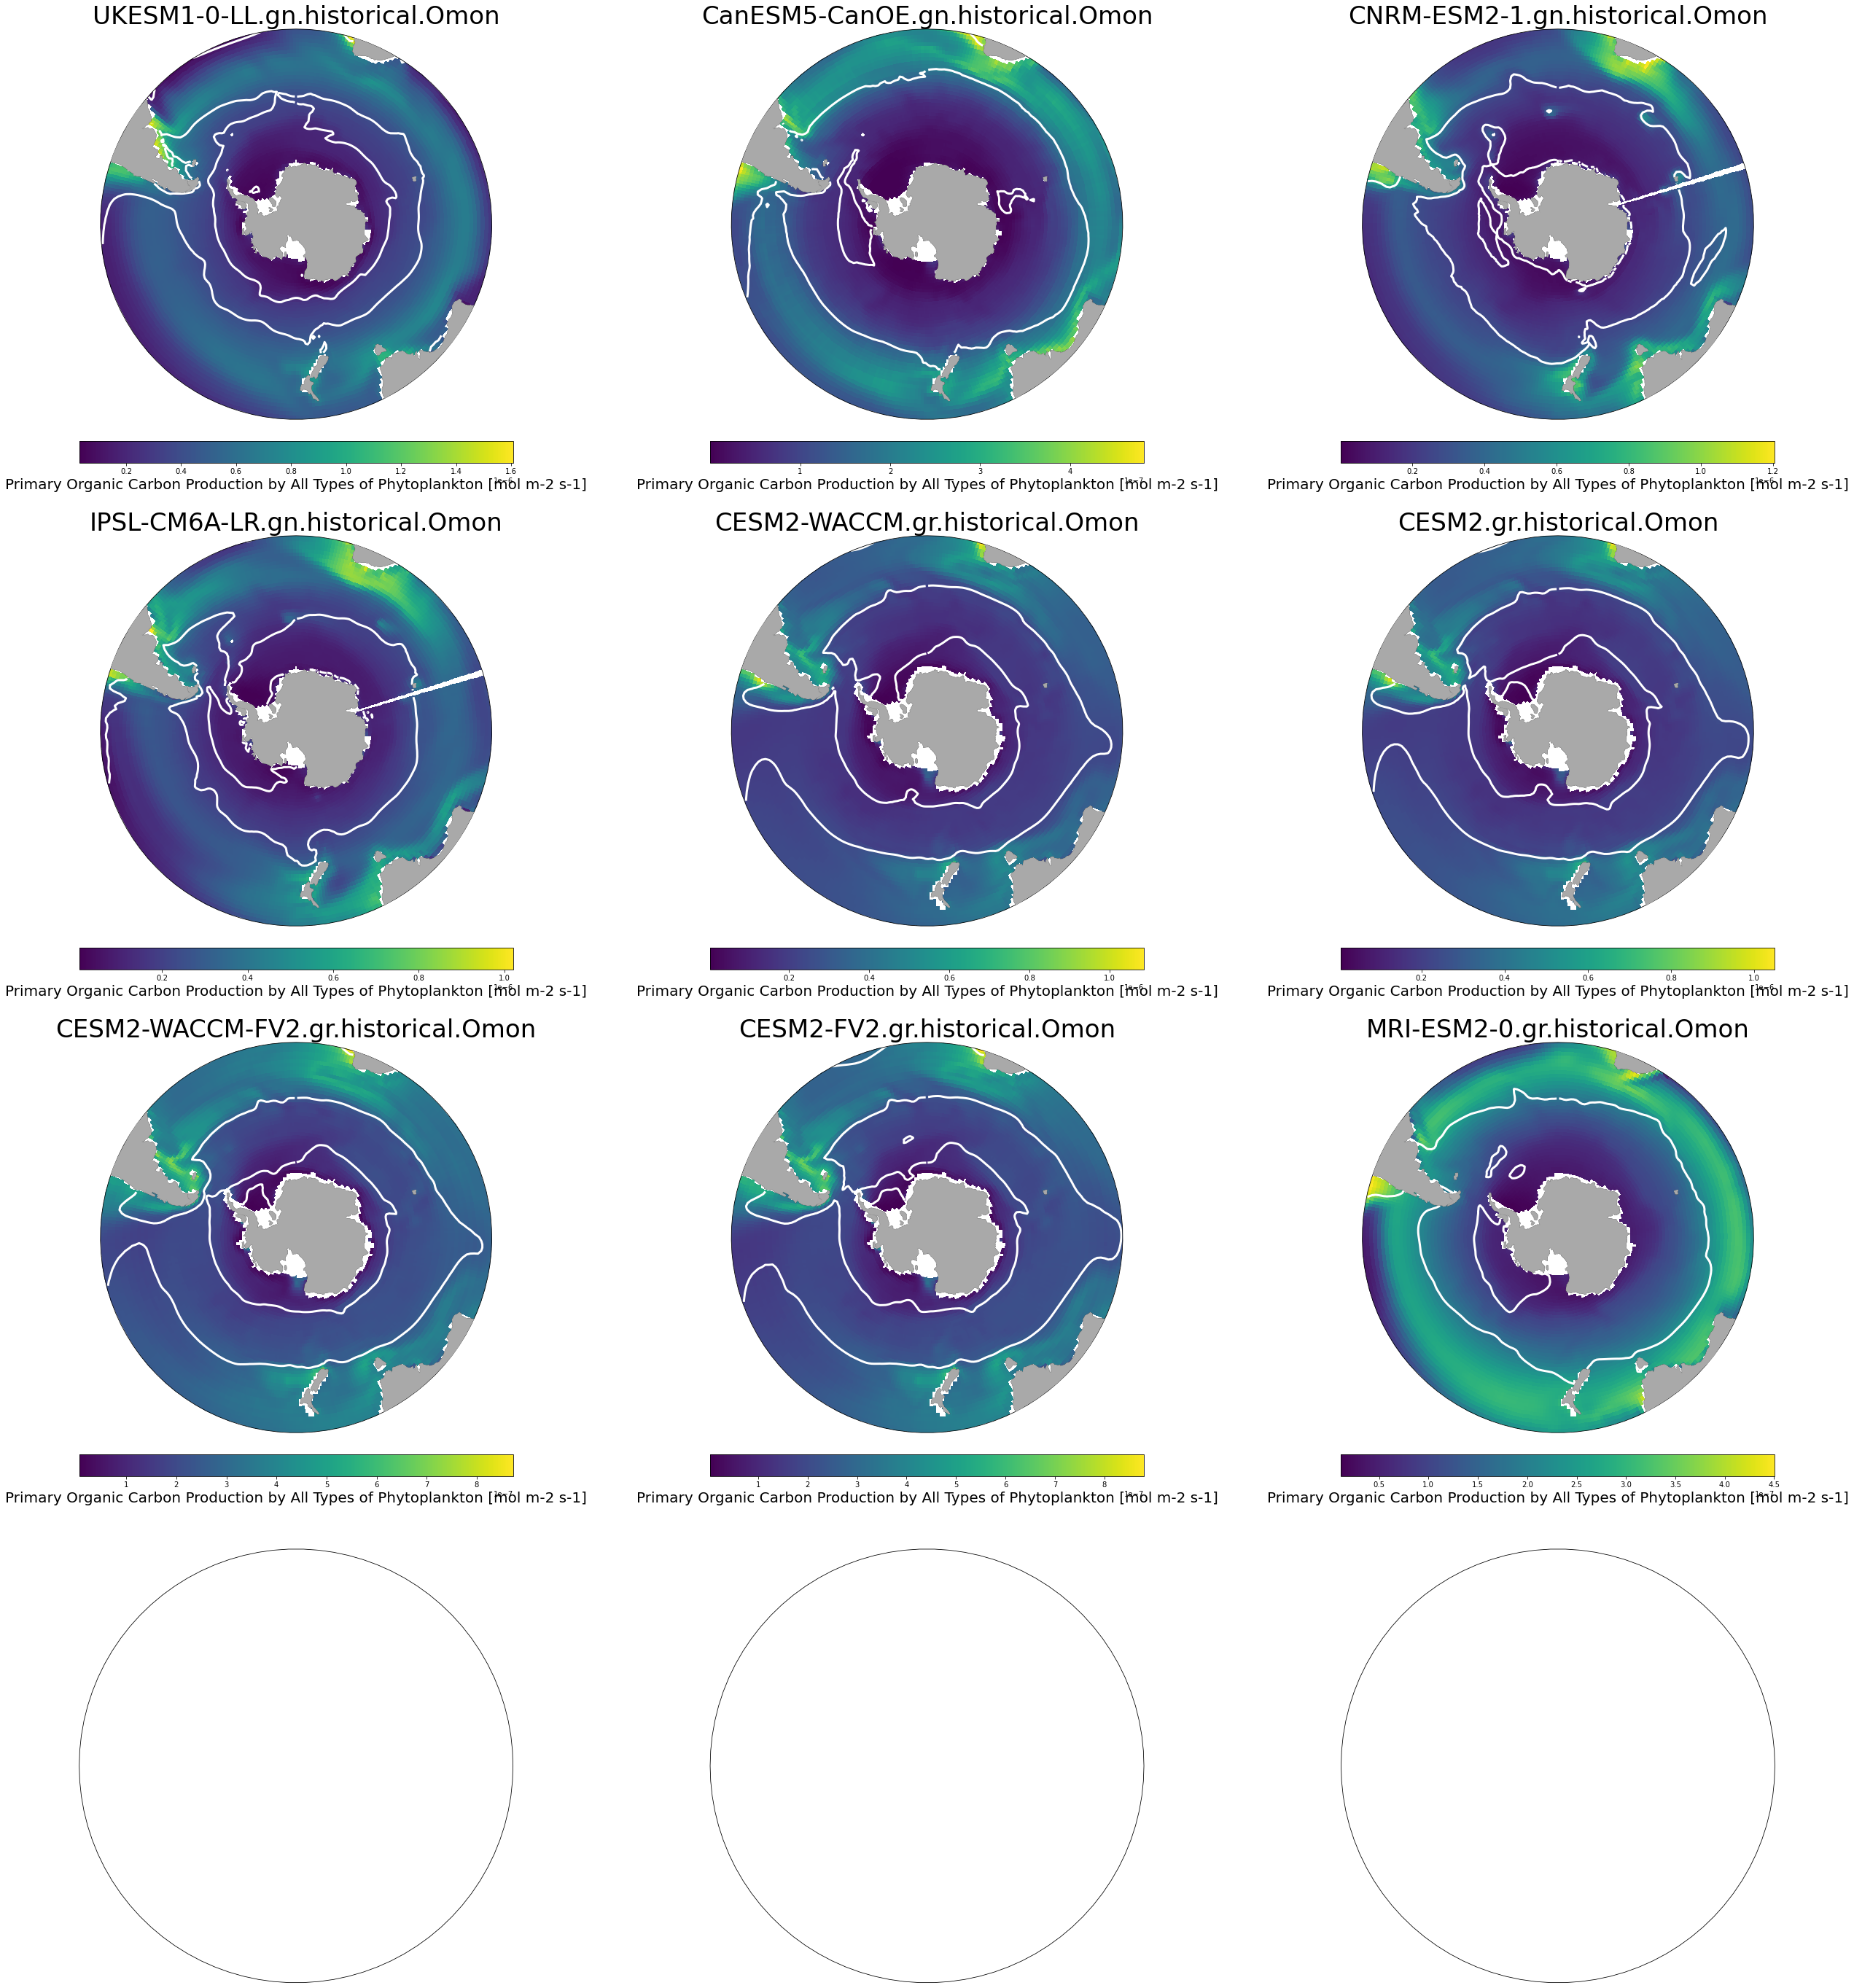

In [20]:
fig, axarr = plt.subplots(nrows = 4, ncols=3, figsize=[40,40], subplot_kw={'projection':ccrs.SouthPolarStereo()})
fig.tight_layout(pad = 10)
crs_plot = ccrs.SouthPolarStereo()
crs_source = ccrs.PlateCarree()

ax_idx = 0 # index for your axes array
for name, ds in dd.items():

    ax = axarr.flat[ax_idx]
    #fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    # ax.gridlines()
    ax.coastlines()
    
    title=name
    ax.set_title(title,fontsize=34,pad = 1)
    
    lat = ds.lat.transpose('y','x')
    lon = ds.lon.transpose('y','x')
    X = lon
    Y = lat
    
    conversion = 3.1536e7 * 83.3
    # 3.1536e7 seconds per year
    # 83.3 mol C per kg -- 12 gC/mol
    
    Z = ds.intpp
    Z2 = dd[name].fgco2 * conversion

    
    
    im = ax.pcolormesh(X,Y,Z,cmap='viridis', transform = crs_source, shading = 'auto')
    # im2 = ax.contourf(X,Y,Z2, transform = crs_source, levels=[0,10],colors='w', linewidths = 3, alpha = 0.3)
    im3 = ax.contour(X,Y,Z2, transform = crs_source, levels=[0],colors='w', linewidths = 3)
    # if name == 'UKESM1-0-LL.gn.historical.Omon' or name =='CanESM5-CanOE.gn.historical.Omon' or name =='CNRM-ESM2-1.gn.historical.Omon' or name == 'CanESM5.gn.historical.Omon' or name == 'IPSL-CM6A-LR.gn.historical.Omon':
    #     CS = ax.contour(rho.lon,rho.lat,rho,transform=crs_source,levels=[26.5, 27, 27.3],colors='g', linewidths = 3)
    # else:
    #     CS = ax.contour(rho.lon.transpose('y','x'),rho.lat.transpose('y','x'),rho.transpose('y','x'),transform=crs_source,levels=[26.5, 27, 27.3],colors='g', linewidths = 3)
    
    cbar_label = 'Primary Organic Carbon Production by All Types of Phytoplankton [mol m-2 s-1]'
    cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.05, pad=0.05)
    cbar.set_label(cbar_label, fontsize = 20)
#     cbar.ax.tick_params(labelsize=18)
#     ax.clabel(CS, inline=1, fontsize=24)
    
    ax_idx += 1


In [27]:
variables = ['areacello']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Ofx'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4']
            )


cat = col.search(**query)

dd_A = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

# combine datasets just to pick first member and it gets naming the way i want
dd_A = combine_datasets(
    dd_A,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)


A = dd_A['GFDL-ESM4.gr.historical.Ofx'].sel(y = slice(-80,-30)).areacello
# # A2 = dd_gr['GFDL-ESM4.gr.historical.Ofx'].areacello
# # A


# newcoords = {'x':dd_A['GFDL-ESM4.gr.historical.Ofx'].areacello['x'], 'y':dd_A['GFDL-ESM4.gr.historical.Ofx'].areacello['y']}
newcoords1 = {'x':A['x'], 'y':A['y']}
newcoords1

for name, ds in dd.items():
    dd[name] = ds.assign_coords(**newcoords1)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


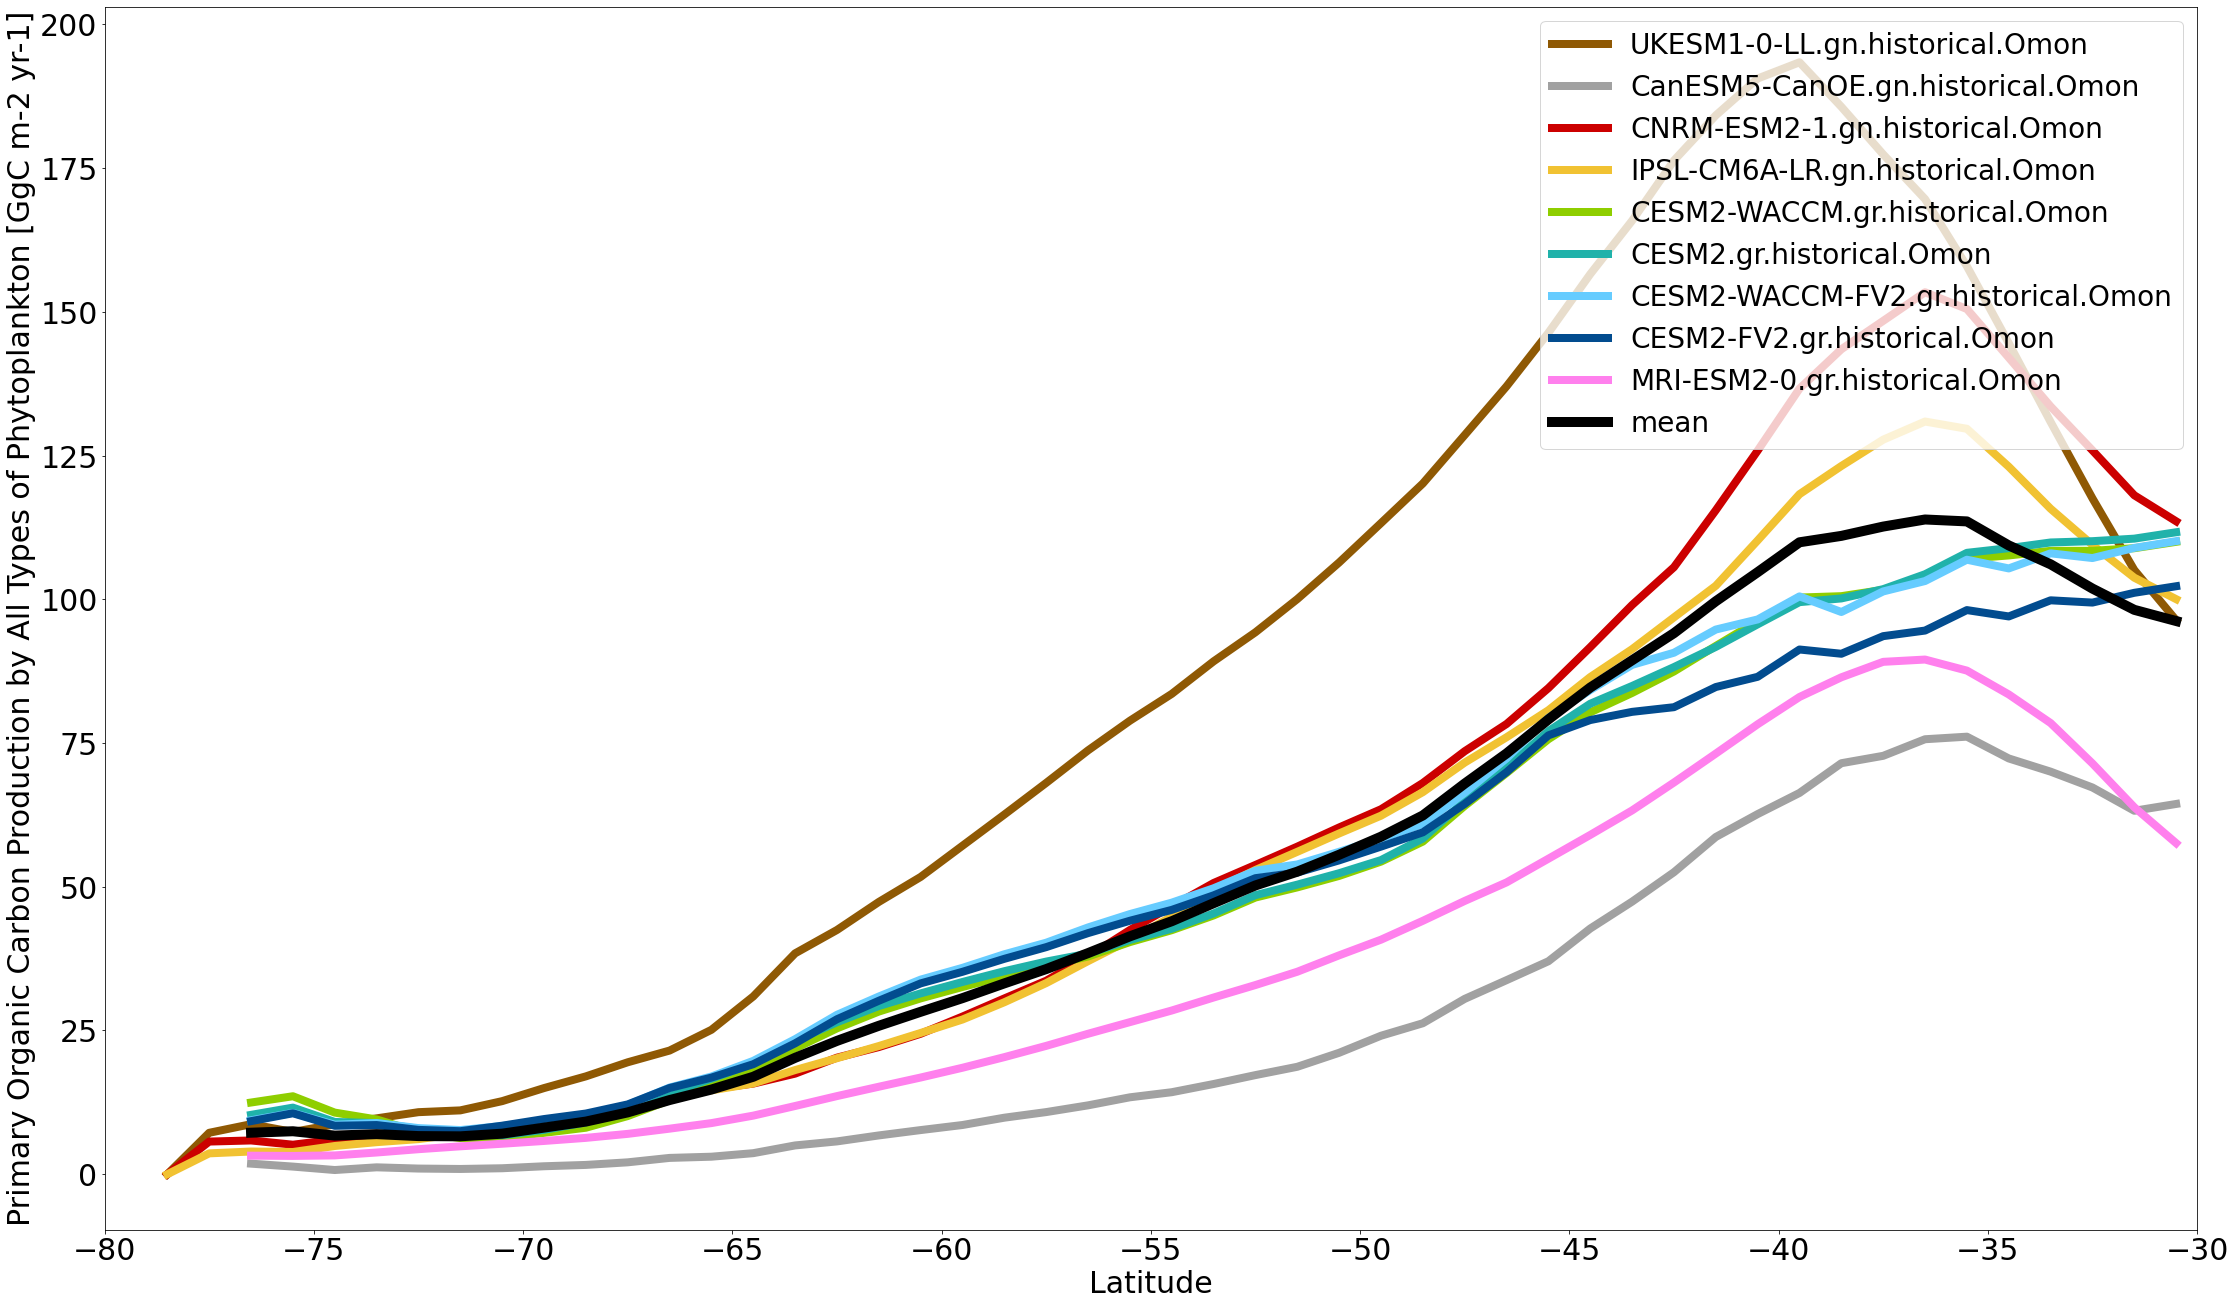

In [35]:
plt.rc('font', size = 30)
plt.rc('axes', titlesize= 30)    
plt.rc('axes', labelsize= 30)
plt.rc('figure', titlesize=30)

temp = {}

conversion = 3.1536e7 * 83.3
# 3.1536e7 seconds per year
# 83.3 mol C per kg -- 12 gC/mol

for name, ds in dd.items():
    ds = ds.intpp*A*conversion*12/1e12
    ds = ds.mean(['x'],keep_attrs=True)
    temp[name] = ds
    plt.plot(ds.y, ds, label = name, lw = 8, **model_kwargs[name])

mn = np.mean(list(temp.values()), axis=0)
plt.plot(ds.y, mn, lw = 10, label = 'mean', color = 'black')
plt.legend(loc='upper right', fontsize = 28)
plt.xlim([-80,-30])
plt.xlabel('Latitude')
plt.ylabel('Primary Organic Carbon Production by All Types of Phytoplankton [GgC m-2 yr-1]')
# plt.title('PCO\u2082 500 meters below the winter mixed layer', fontsize = 40)
plt.xticks([-80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30])
plt.rcParams["figure.figsize"] = (37.5,22.5)

# Should I integrate zonally and meridionally to get like a total carbon production in the SO